In [49]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import openweathermapy.core as ow
import json
import requests as req
import random
import time

In [50]:
cities_data = pd.read_csv('worldcities.csv')


In [51]:
random_cities = cities_data.sample(n=500)
random_cities.head()

,Country,City,Latitude,Longitude
13973,gr,naxos,37.105556,25.376389
42438,us,napa,38.297222,-122.284444
8907,de,glinde,53.550000,10.200000
37629,ru,petropavlovskaya,45.081894,40.451253
14924,hn,guinope,13.883333,-86.933333


In [52]:
random_cities["Temp"] = ""
random_cities["Humidity"] = ""
random_cities["Cloudiness"] = ""
random_cities["Wind Speed"] = ""
random_cities.head()

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
13973,gr,naxos,37.105556,25.376389,,,,
42438,us,napa,38.297222,-122.284444,,,,
8907,de,glinde,53.550000,10.200000,,,,
37629,ru,petropavlovskaya,45.081894,40.451253,,,,
14924,hn,guinope,13.883333,-86.933333,,,,


In [53]:
api_key = "2c263cd1454305f3e560ee3e7652fbbf"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [54]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2c263cd1454305f3e560ee3e7652fbbf&units=metric&q=aspindza'

In [55]:
weather_data = []

for city in random_cities.City:
    
    time.sleep(1)
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
    weather_data.append(req.get(query_url).json())
weather_data[0]
print(weather_data)

[{'coord': {'lon': 25.38, 'lat': 37.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.26, 'pressure': 1017.89, 'humidity': 100, 'temp_min': 19.26, 'temp_max': 19.26, 'sea_level': 1021.49, 'grnd_level': 1017.89}, 'wind': {'speed': 7.92, 'deg': 253.001}, 'clouds': {'all': 0}, 'dt': 1509315810, 'sys': {'message': 0.1666, 'country': 'GR', 'sunrise': 1509252036, 'sunset': 1509290586}, 'id': 256632, 'name': 'Naxos', 'cod': 200}, {'coord': {'lon': -122.29, 'lat': 38.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.22, 'pressure': 1011, 'humidity': 77, 'temp_min': 14, 'temp_max': 25}, 'visibility': 16093, 'wind': {'speed': 2.6, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1509314400, 'sys': {'type': 1, 'id': 434, 'message': 0.247, 'country': 'US', 'sunrise': 1509287612, 'sunset': 1509325888}, 'id': 5376095, 'name': 'Napa', 'cod': 200}, {'

In [61]:
random_cities["Temp"] = temp_data
random_cities["Humidity"] = humid_data
random_cities["Cloudiness"] = cloud_data
random_cities["Wind Speed"] = wind_data

In [62]:
temp_data = [data.get("main").get("temp") for data in weather_data]
humid_data = [data.get("main").get("humidity") for data in weather_data]
cloud_data = [data.get("clouds").get("all") for data in weather_data]
wind_data = [data.get("wind").get("speed") for data in weather_data]

In [63]:
random_cities.head()

,Country,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
13973,gr,naxos,37.105556,25.376389,19.26,100,0,7.92
42438,us,napa,38.297222,-122.284444,20.22,77,1,2.60
8907,de,glinde,53.550000,10.200000,7.51,75,0,4.10
37629,ru,petropavlovskaya,45.081894,40.451253,10.76,95,92,3.47
14924,hn,guinope,13.883333,-86.933333,21.00,77,75,5.10


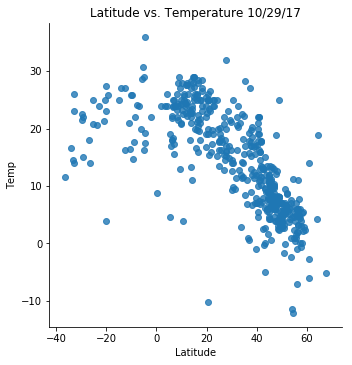

In [79]:
sns.lmplot(x='Latitude', y='Temp', data=random_cities,
           fit_reg=False)
plt.title("Latitude vs. Temperature 10/29/17")
plt.show()


In [73]:
plt.show()

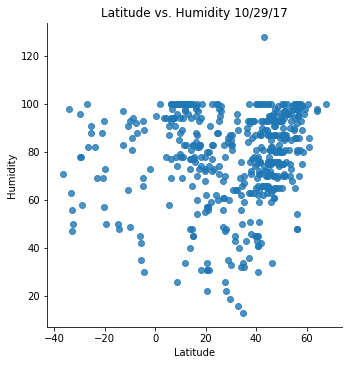

In [80]:
sns.lmplot(x='Latitude', y='Humidity', data=random_cities,
           fit_reg=False)
plt.title("Latitude vs. Humidity 10/29/17")
plt.show()

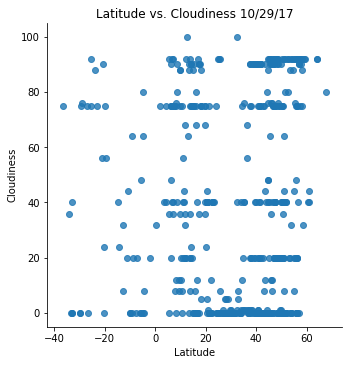

In [81]:
sns.lmplot(x='Latitude', y='Cloudiness', data=random_cities,
           fit_reg=False)
plt.title("Latitude vs. Cloudiness 10/29/17")
plt.show()

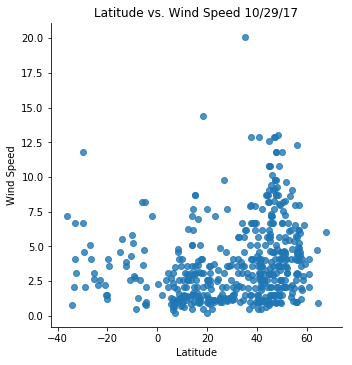

In [82]:
sns.lmplot(x='Latitude', y='Wind Speed', data=random_cities,
           fit_reg=False)
plt.title("Latitude vs. Wind Speed 10/29/17")
plt.show()